# TRAFFIC FORECAST

importing necessary files

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet # type: ignore

loading the datasets

In [132]:

df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


 Displaying the dataframe to verify loading

In [133]:

df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


 Checking for missing values in each column

In [134]:

# check null values
df.isnull().sum()


ID          0
Datetime    0
Count       0
dtype: int64


Displaying dataset info, including data types and non-null counts

In [135]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


Converting 'Datetime' column from object to datetime format

In [136]:

# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


 Exploratory Data Analysis (EDA): Plotting traffic count over time

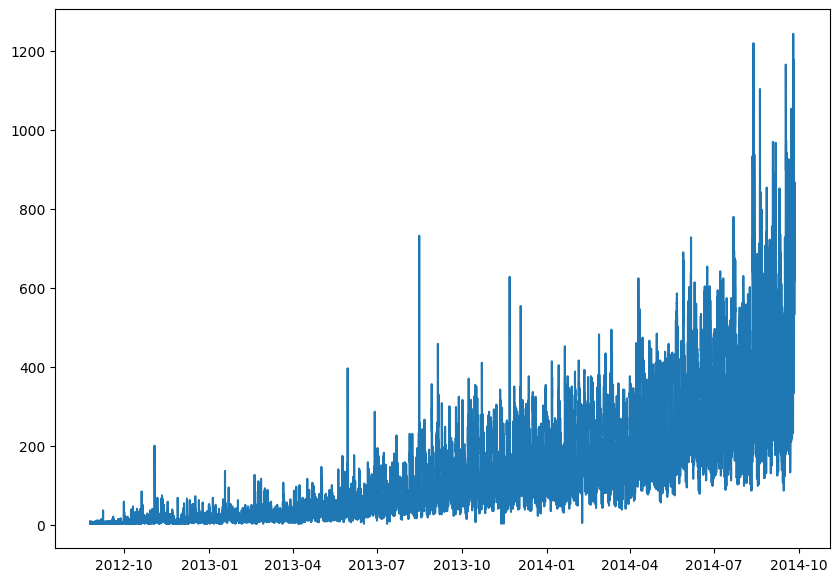

In [137]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()


 Preparing data for Prophet model

In [138]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


Creating a 'ds' column for dates, required by Prophet

In [139]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


Splitting the data into training and testing sets (last 60 days as test)

In [140]:

size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

Displaying the last few rows of the training set

In [141]:

train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


Displaying the first few rows of the test set

In [142]:

test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


Displaying the last few rows of the test set

In [143]:

test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


<!-- # Initializing and training the Prophet model on training data -->

Initializing and training the Prophet model on training data

In [144]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing


<!-- Creating a future dataframe for predictions (forecasting 60 days ahead) -->

Creating a future dataframe for predictions (forecasting 60 days ahead)

In [145]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


<!-- Predicting future values -->

 Predicting future values

In [146]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-480.337909,-1728.439897,192.940893,-480.337909,-480.337909,-339.583579,-339.583579,-339.583579,-846.171911,-846.171911,-846.171911,506.588331,506.588331,506.588331,0.0,0.0,0.0,-819.921488
1,2012-08-26,-473.321772,-1902.117082,22.453049,-473.321772,-473.321772,-455.440680,-455.440680,-455.440680,-967.137423,-967.137423,-967.137423,511.696743,511.696743,511.696743,0.0,0.0,0.0,-928.762452
2,2012-08-27,-466.305636,-505.203175,1405.013758,-466.305636,-466.305636,946.509678,946.509678,946.509678,431.194541,431.194541,431.194541,515.315137,515.315137,515.315137,0.0,0.0,0.0,480.204042
3,2012-08-28,-459.289500,-439.143628,1497.639989,-459.289500,-459.289500,957.117210,957.117210,957.117210,439.558793,439.558793,439.558793,517.558416,517.558416,517.558416,0.0,0.0,0.0,497.827710
4,2012-08-29,-452.273363,-368.797987,1463.543962,-452.273363,-452.273363,918.302037,918.302037,918.302037,399.753865,399.753865,399.753865,518.548172,518.548172,518.548172,0.0,0.0,0.0,466.028674


<!-- Plotting the components of the forecast (trend, weekly seasonality, yearly seasonality, etc.) -->

Plotting the components of the forecast (trend, weekly seasonality, yearly seasonality, etc.)

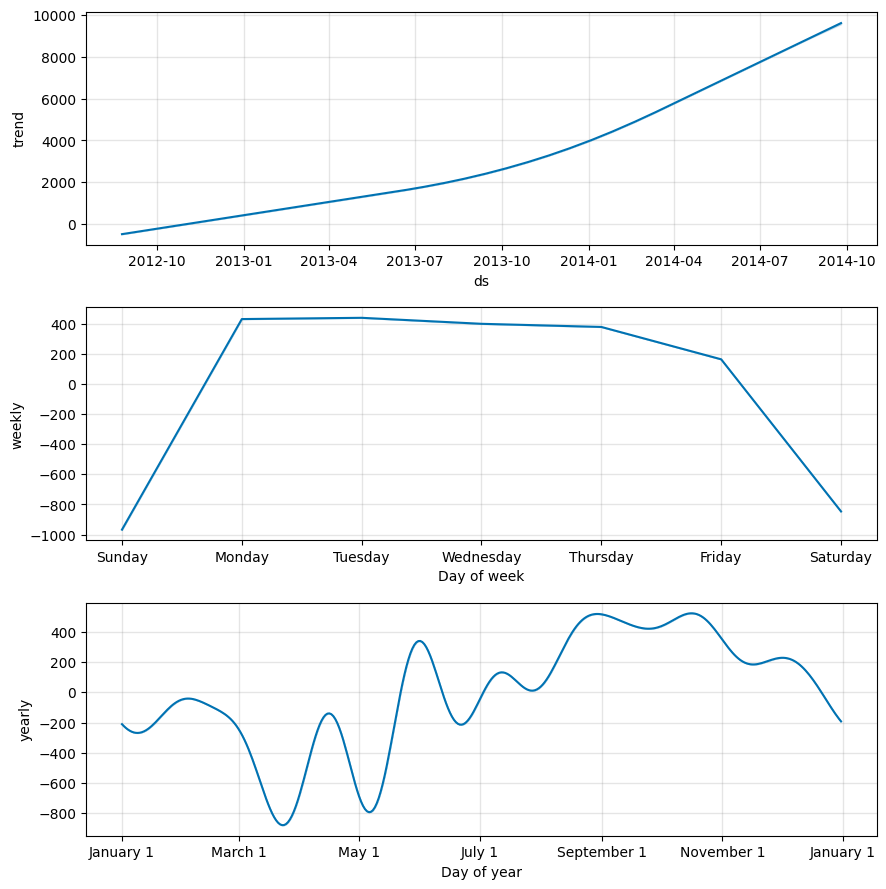

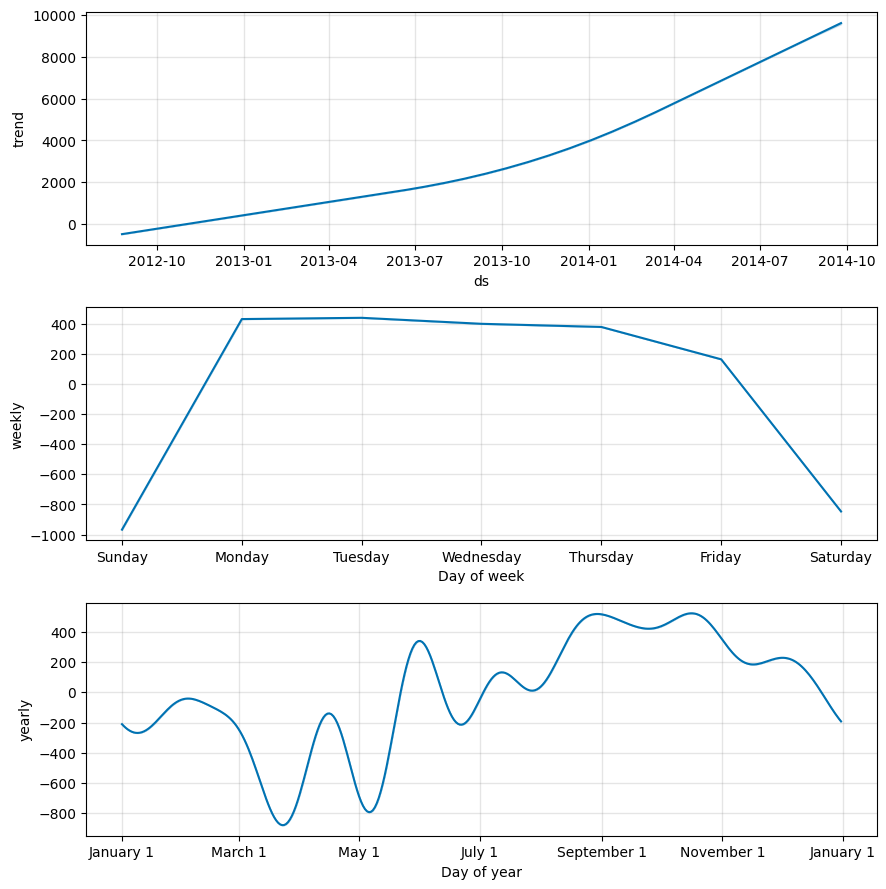

In [147]:
model.plot_components(forecast)

Extracting the forecasted values for the test period (last 60 days)

In [148]:
pred = forecast.iloc[-60:, :]
len(pred)

60

 Plotting actual test data vs predicted values

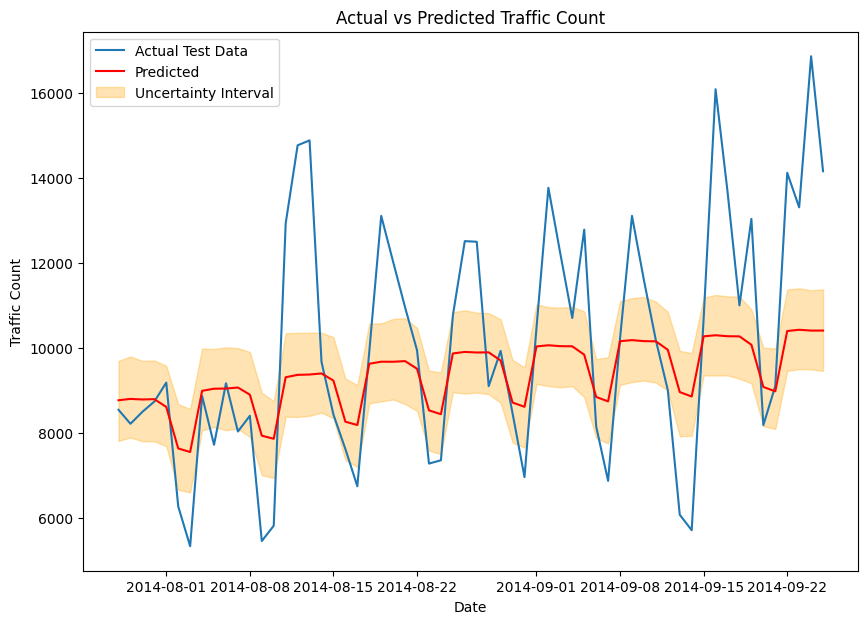

In [149]:
plt.figure(figsize=(10, 7))
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(pred['ds'], pred['yhat'], color='red', label='Predicted')
plt.fill_between(pred['ds'], pred['yhat_lower'], pred['yhat_upper'], color='orange', alpha=0.3, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.title('Actual vs Predicted Traffic Count')
plt.legend()
plt.show()


 Plotting the entire dataset

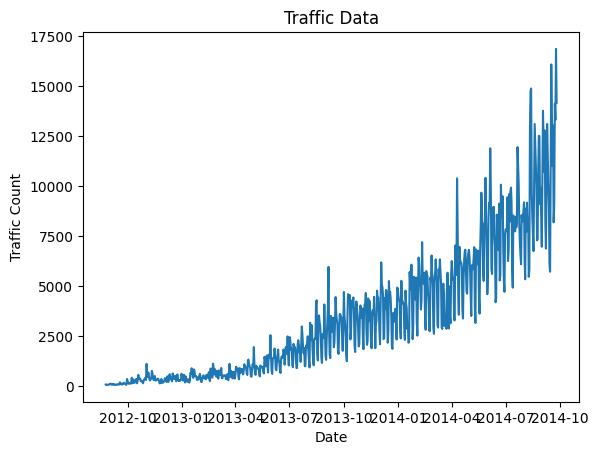

In [150]:
plt.plot(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.title('Traffic Data')
plt.show()

Plotting the forecasted values over time

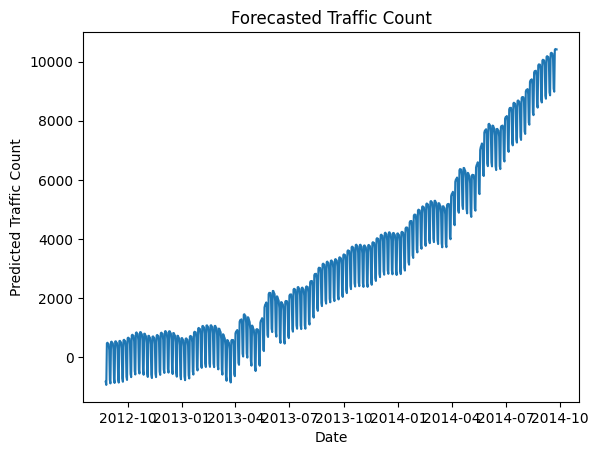

In [151]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.xlabel('Date')
plt.ylabel('Predicted Traffic Count')
plt.title('Forecasted Traffic Count')
plt.show()


Refitting the model on the full dataset and forecasting for the next 200 days

In [152]:

model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-678.420288,-2290.955421,-1.959090,-678.420288,-678.420288,-426.080779,-426.080779,-426.080779,-995.205327,-995.205327,-995.205327,569.124548,569.124548,569.124548,0.0,0.0,0.0,-1104.501067
1,2012-08-26,-670.344293,-2442.549002,-120.839443,-670.344293,-670.344293,-584.291763,-584.291763,-584.291763,-1144.274888,-1144.274888,-1144.274888,559.983125,559.983125,559.983125,0.0,0.0,0.0,-1254.636056
2,2012-08-27,-662.268297,-889.170389,1485.208603,-662.268297,-662.268297,1005.578173,1005.578173,1005.578173,457.597131,457.597131,457.597131,547.981042,547.981042,547.981042,0.0,0.0,0.0,343.309876
3,2012-08-28,-654.192302,-658.386151,1711.308893,-654.192302,-654.192302,1142.316891,1142.316891,1142.316891,608.386711,608.386711,608.386711,533.930180,533.930180,533.930180,0.0,0.0,0.0,488.124589
4,2012-08-29,-646.116307,-792.613455,1586.299151,-646.116307,-646.116307,1075.584631,1075.584631,1075.584631,556.923289,556.923289,556.923289,518.661342,518.661342,518.661342,0.0,0.0,0.0,429.468325


<!-- Plotting the extended forecast -->

Plotting the extended forecast

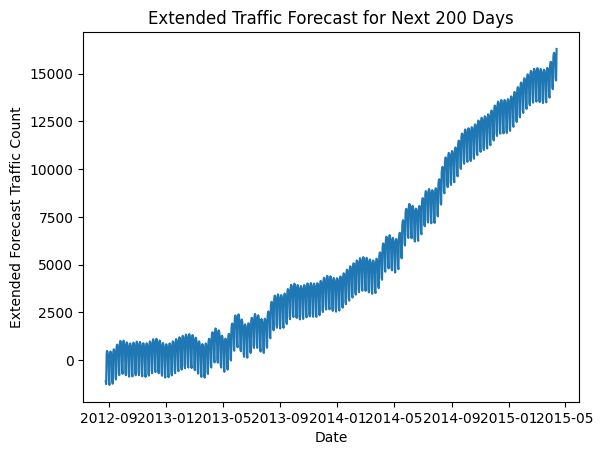

In [153]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.xlabel('Date')
plt.ylabel('Extended Forecast Traffic Count')
plt.title('Extended Traffic Forecast for Next 200 Days')
plt.show()

In [154]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor  # Assuming 'Count' is a continuous variable
# import pickle

# # Load the data
# data = pd.read_csv('Traffic data.csv')

# # Prepare the features (X) and target (y)
# X = data.drop(['Count', 'ID'], axis=1)  # Drop the target and ID columns
# X['Datetime'] = pd.to_datetime(X['Datetime'])  # Convert to datetime if needed
# X['Hour'] = X['Datetime'].dt.hour  # Example: extracting hour from Datetime
# X['DayOfWeek'] = X['Datetime'].dt.dayofweek  # Example: extracting day of week
# X = X.drop('Datetime', axis=1)  # Drop original Datetime column after feature extraction

# y = data['Count']  # Target variable

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a model (RandomForest example)
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Save the model
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)


In [155]:
import pickle

# Save the model to a file using pickle
with open('prophet.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")


Model saved successfully.


In [156]:
# with open('prophet.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# loaded_model.score(X_test, y_test)

In [157]:
import joblib
joblib.dump(model, 'prophet_model.joblib')

['prophet_model.joblib']